In [415]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [416]:
df = pd.read_csv('investigate_dataset_csv.csv')
df = pd.DataFrame(df)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


df.info() Findings:
1. No null objects in any column
2. ScheduledDay format = object - Convert to datetime format
3. AppointmentDay format = object - Convert to datetime format


In [418]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [419]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'],infer_datetime_format= True)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], infer_datetime_format= True)

df['ScheduledDay'] = df['ScheduledDay'].dt.normalize()

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


# Data Cleanup to do:
1. PatientId column contains 'e+'
2. Neighbourhood column contains special characters
3. Change the column names to lower case and rename the last column  from 'No-show' to 'appointment_outcome'
4. Change column 'No-show' values from 'Yes' to 'no-show' & 'no' to 'show'


In [420]:
# 1. Removing 'e+' from PatientId column

df['PatientId'] = df['PatientId'].astype(int)
df['PatientId'] = df['PatientId'].astype(str)
df['PatientId'] = df['PatientId'].str.extract('(\d+)', expand =False)

df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2147483648,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,2147483648,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,2147483648,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,2147483648,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,2147483648,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [421]:
#2. Removing special characters from Neighbourhood column

def non_al(string):
    return re.sub('[^a-zA-Z]', "",string)

df['Neighbourhood'] = df['Neighbourhood'].apply(non_al)
df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2147483648,5642903,F,2016-04-29,2016-04-29,62,JARDIMDAPENHA,0,1,0,0,0,0,No
1,2147483648,5642503,M,2016-04-29,2016-04-29,56,JARDIMDAPENHA,0,0,0,0,0,0,No
2,2147483648,5642549,F,2016-04-29,2016-04-29,62,MATADAPRAIA,0,0,0,0,0,0,No
3,2147483648,5642828,F,2016-04-29,2016-04-29,8,PONTALDECAMBURI,0,0,0,0,0,0,No
4,2147483648,5642494,F,2016-04-29,2016-04-29,56,JARDIMDAPENHA,0,1,1,0,0,0,No


# Column keep/drop justification
• Columns to drop = AppointmentID, Hipertension, Diabetes
• Possible barriers hence correlation for no show = Age, Scholarship, Alcoholism, Handcap

In [422]:
df.drop(['AppointmentID','Hipertension','Diabetes', 'AppointmentID'],axis = 1, inplace = True)
df.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show'],
      dtype='object')

In [423]:
# 3. Change the column names to lower case and rename the last column  from 'No-show' to 'appointment_outcome'

df = df.rename(columns={'PatientId' : 'patientid', 'Gender' : 'gender', 'ScheduledDay' : 'scheduledday',
       'AppointmentDay': 'appointmentday', 'Age' : 'age', 'Neighbourhood': 'neighbourhood', 'Scholarship' : 'scholarship', 
        'Alcoholism' : 'alcoholism', 'Handcap' :'handcap', 'SMS_received' : 'sms_received', 'No-show': 'appointment_outcome'})

df.columns

Index(['patientid', 'gender', 'scheduledday', 'appointmentday', 'age',
       'neighbourhood', 'scholarship', 'alcoholism', 'handcap', 'sms_received',
       'appointment_outcome'],
      dtype='object')

In [424]:
# 4. Change column 'No-show' values from 'Yes' to 'no-show' & 'no' to 'show'

# Count number of 'yes' and 'no' before replacing
yes_no = df.groupby('appointment_outcome').size()
print(yes_no)

# Replace 'Yes' to '0' (appointment noshow) & 'No' to '1' (appointment show) to help with plotting
df['appointment_outcome'] = df['appointment_outcome'].replace(['Yes','No'],['0', '1']) 
#df['appointment_outcome'] = df['appointment_outcome'].replace(['Yes','No'],['no show', 'show']) 

# Confirmation
show_noshow = df.groupby('appointment_outcome').size()
print(show_noshow)
df.head()

appointment_outcome
No     88208
Yes    22319
dtype: int64
appointment_outcome
0    22319
1    88208
dtype: int64


,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,alcoholism,handcap,sms_received,appointment_outcome
0,2147483648,F,2016-04-29,2016-04-29,62,JARDIMDAPENHA,0,0,0,0,1
1,2147483648,M,2016-04-29,2016-04-29,56,JARDIMDAPENHA,0,0,0,0,1
2,2147483648,F,2016-04-29,2016-04-29,62,MATADAPRAIA,0,0,0,0,1
3,2147483648,F,2016-04-29,2016-04-29,8,PONTALDECAMBURI,0,0,0,0,1
4,2147483648,F,2016-04-29,2016-04-29,56,JARDIMDAPENHA,0,0,0,0,1


In [425]:
# Converting dataframe to csv

df_clean = df
df_clean = df_clean.to_csv('df_clean.csv')

In [426]:
# Loading file

df_clean = pd.read_csv('df_clean.csv')
df_clean = pd.DataFrame(df_clean)

df_clean['scheduledday'] = pd.to_datetime(df['scheduledday'],infer_datetime_format= True)
df_clean['appointmentday'] = pd.to_datetime(df['appointmentday'], infer_datetime_format= True)

# Number of days from schedule to appointment day could also be a factor for no show.
df_clean['gap_days'] = df['appointmentday']-df['scheduledday']


# Converting gap column from datetime format to str to extract 'days' from the column
df_clean['gap_days'] = df_clean['gap_days'].astype(str)

# Retaining only numeric data in the column 'gap_days'
df_clean['gap_days'] = df_clean['gap_days'].str.extract('(\d+)', expand = False)
df_clean['gap_days'] = df_clean['gap_days'].astype(int)

print(df_clean.shape)
df_clean.head()


(110527, 13)


,Unnamed: 0,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,alcoholism,handcap,sms_received,appointment_outcome,gap_days
0,0,2147483648,F,2016-04-29,2016-04-29,62,JARDIMDAPENHA,0,0,0,0,1,0
1,1,2147483648,M,2016-04-29,2016-04-29,56,JARDIMDAPENHA,0,0,0,0,1,0
2,2,2147483648,F,2016-04-29,2016-04-29,62,MATADAPRAIA,0,0,0,0,1,0
3,3,2147483648,F,2016-04-29,2016-04-29,8,PONTALDECAMBURI,0,0,0,0,1,0
4,4,2147483648,F,2016-04-29,2016-04-29,56,JARDIMDAPENHA,0,0,0,0,1,0


In [427]:
df_clean.describe()

,Unnamed: 0,patientid,age,scholarship,alcoholism,handcap,sms_received,appointment_outcome,gap_days
count,110527.000000,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,55263.000000,2.144592e+09,37.088874,0.098266,0.030400,0.022248,0.321026,0.798067,10.183883
std,31906.540939,6.643437e+07,23.110205,0.297675,0.171686,0.161543,0.466873,0.401444,15.254875
min,0.000000,3.920000e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27631.500000,2.147484e+09,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55263.000000,2.147484e+09,37.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,82894.500000,2.147484e+09,55.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000
max,110526.000000,2.147484e+09,115.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


In [428]:
# cut colums age to 4 levels ((0-18), (18-37), (37-55),(55 & older)) & gap to 3 levels (1week, 2weeks, >2weeks)

age_bins = [0,18,37,55,115]
age_labels= ['Teen','Adult','Middle Age', 'Senior']
df_clean['age']= pd.cut(df_clean['age'], bins = age_bins, labels = age_labels,include_lowest = False)

df_clean.head()                

,Unnamed: 0,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,alcoholism,handcap,sms_received,appointment_outcome,gap_days
0,0,2147483648,F,2016-04-29,2016-04-29,Senior,JARDIMDAPENHA,0,0,0,0,1,0
1,1,2147483648,M,2016-04-29,2016-04-29,Senior,JARDIMDAPENHA,0,0,0,0,1,0
2,2,2147483648,F,2016-04-29,2016-04-29,Senior,MATADAPRAIA,0,0,0,0,1,0
3,3,2147483648,F,2016-04-29,2016-04-29,Teen,PONTALDECAMBURI,0,0,0,0,1,0
4,4,2147483648,F,2016-04-29,2016-04-29,Senior,JARDIMDAPENHA,0,0,0,0,1,0


In [429]:
df_clean.describe()

,Unnamed: 0,patientid,scholarship,alcoholism,handcap,sms_received,appointment_outcome,gap_days
count,110527.000000,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,55263.000000,2.144592e+09,0.098266,0.030400,0.022248,0.321026,0.798067,10.183883
std,31906.540939,6.643437e+07,0.297675,0.171686,0.161543,0.466873,0.401444,15.254875
min,0.000000,3.920000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27631.500000,2.147484e+09,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55263.000000,2.147484e+09,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,82894.500000,2.147484e+09,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000
max,110526.000000,2.147484e+09,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


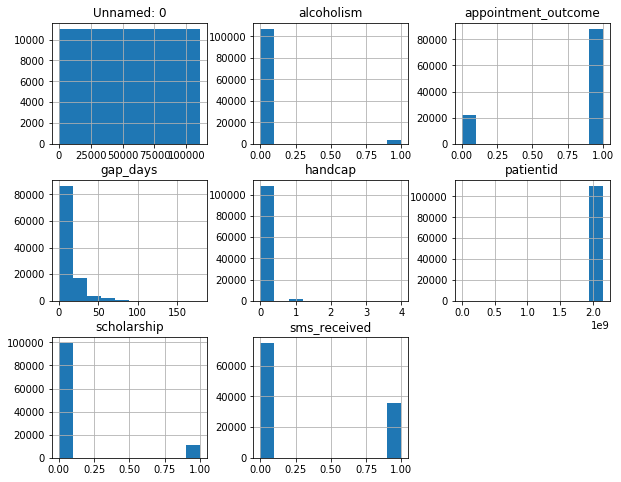

In [430]:
df_clean.hist(figsize = (10,8));

##pair plot

In [431]:
# Mask

show = df_clean.appointment_outcome == True
noshow = df_clean.appointment_outcome == False


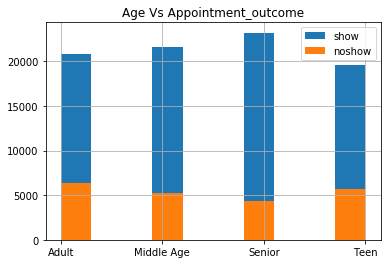

In [432]:
df_clean['age'][show].hist(label = 'show' )
df_clean['age'][noshow].hist(label = 'noshow')
plt.legend()
plt.title('Age Vs Appointment_outcome');

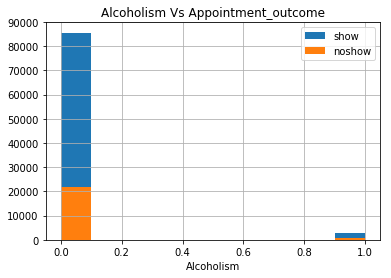

In [433]:
df_clean['alcoholism'][show].hist(label = 'show')
df_clean['alcoholism'][noshow].hist(label = 'noshow')
plt.legend()
plt.xlabel('Alcoholism')
plt.title('Alcoholism Vs Appointment_outcome');

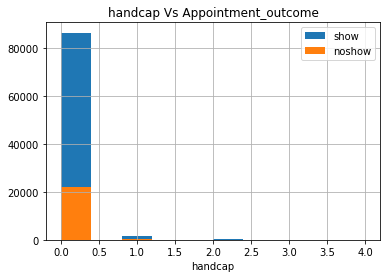

In [434]:
df_clean['handcap'][show].hist(label = 'show')
df_clean['handcap'][noshow].hist(label = 'noshow')
plt.legend()
plt.xlabel('handcap')
plt.title('handcap Vs Appointment_outcome');

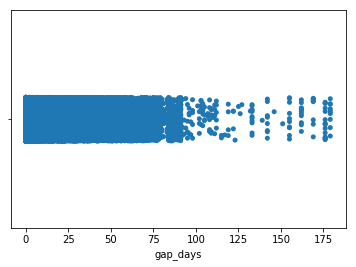

In [435]:

sns.stripplot(df_clean.gap_days, jitter = True)
#sns.stripplot(turnos.WaitTime, jitter=True)

Text(0.5,1,'Gap Days Vs Appointment_outcome')

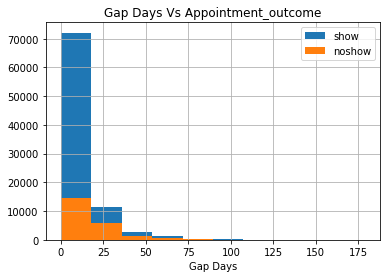

In [436]:

df_clean['gap_days'][show].hist(label = 'show')
df_clean['gap_days'][noshow].hist(label = 'noshow')
plt.legend()
plt.xlabel('Gap Days')
plt.title('Gap Days Vs Appointment_outcome')

# Gap days vs Appointment outcome :
If the gap between scheduled day and appointment day is greater than 20 days, patients showing up for the appointment drastically decreases

In [437]:
df_clean.groupby('gender').size()
# Approximately 50% more female patients than male patients

gender
F    71840
M    38687
dtype: int64

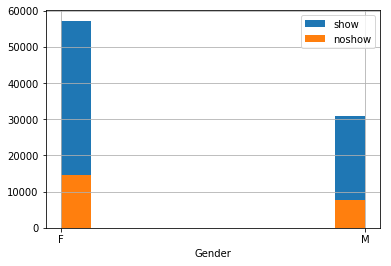

In [438]:
df_clean['gender'][show].hist(label = 'show')
df_clean['gender'][noshow].hist(label = 'noshow')
plt.xlabel('Gender')
plt.legend();

# Gender vs appointment outcome :
Gender and appointment outcome does not have a correlation

In [439]:
df_clean.groupby('sms_received').size()

sms_received
0    75045
1    35482
dtype: int64

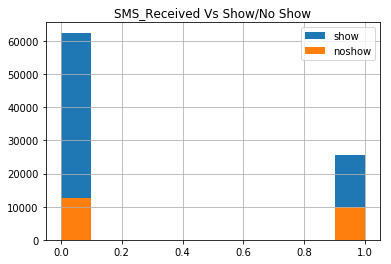

In [440]:
df_clean['sms_received'][show].hist(label = 'show')
df_clean['sms_received'][noshow].hist(label = 'noshow')
plt.legend()
plt.title('SMS_Received Vs Show/No Show');

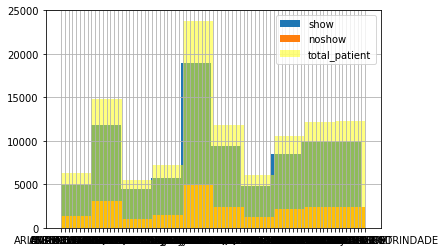

In [441]:
df_clean['neighbourhood'][show].hist(label = 'show')
df_clean['neighbourhood'][noshow].hist(label = 'noshow')
df_clean['neighbourhood'].hist(label = 'total_patient',color = 'yellow', alpha = 0.5)
plt.legend()
plt.figsize=(20,19);

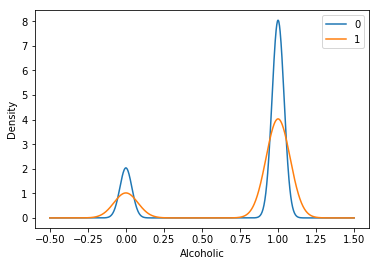

In [442]:
df_clean.groupby('alcoholism').appointment_outcome.plot(kind='kde')
plt.legend()
plt.xlabel('Alcoholic');

In [443]:
gender_show = df_clean['gender'][show].value_counts()
gender_noshow = df_clean['gender'][noshow].value_counts()
sum_gender = df_clean.groupby('gender').size()
print(sum_gender)
print(gender_show)
print(gender_noshow)

gender
F    71840
M    38687
dtype: int64
F    57246
M    30962
Name: gender, dtype: int64
F    14594
M     7725
Name: gender, dtype: int64


In [444]:
male_show_per = 100*gender_show[1]/sum_gender[1]
female_show_per = 100*gender_show[0]/sum_gender[0]
print(male_show_per)
print(female_show_per)

80.0320521105
79.6854120267


In [445]:

def show(df,column,show=0, noshow=0):
    
    show = df_clean.appointment_outcome == True
    noshow = df_clean.appointment_outcome == False
    
 
    print('unique_sum: \n{}'.format(df.groupby(column).size()))
    print('\nshow: \n{}'.format(column[show].value_counts()))
    print('\nnoshow: \n{}'.format(column[noshow].value_counts()))
    
    
    


In [446]:
# Data based on age of the patient

show(df_clean,df_clean.age,show)


unique_sum: 
age
Teen          25327
Adult         27250
Middle Age    26906
Senior        27504
dtype: int64

show: 
Senior        23201
Middle Age    21651
Adult         20836
Teen          19619
Name: age, dtype: int64

noshow: 
Adult         6414
Teen          5708
Middle Age    5255
Senior        4303
Name: age, dtype: int64


In [447]:
# Data based on alcoholism of the patient

show(df_clean,df_clean.alcoholism,show)

unique_sum: 
alcoholism
0    107167
1      3360
dtype: int64

show: 
0    85525
1     2683
Name: alcoholism, dtype: int64

noshow: 
0    21642
1      677
Name: alcoholism, dtype: int64


In [448]:
show(df_clean,df_clean.scholarship,show)

unique_sum: 
scholarship
0    99666
1    10861
dtype: int64

show: 
0    79925
1     8283
Name: scholarship, dtype: int64

noshow: 
0    19741
1     2578
Name: scholarship, dtype: int64


In [450]:
show(df_clean,df_clean.sms_received,show)

unique_sum: 
sms_received
0    75045
1    35482
dtype: int64

show: 
0    62510
1    25698
Name: sms_received, dtype: int64

noshow: 
0    12535
1     9784
Name: sms_received, dtype: int64


In [451]:
# Neighbourhood with max show & noshow

show = df_clean.appointment_outcome == True
noshow = df_clean.appointment_outcome == False



print('max_patient_show_neighbourhood: \n{}'.format(df_clean.loc[df_clean['neighbourhood'][show].value_counts().max()]))
print('\nmax_patient_noshow_neighbourhood: \n{}'.format(df_clean.loc[df_clean['neighbourhood'][noshow].value_counts().max()]))



max_patient_show_neighbourhood: 
Unnamed: 0                            6252
patientid                       2147483648
gender                                   F
scheduledday           2016-05-16 00:00:00
appointmentday         2016-05-18 00:00:00
age                                 Senior
neighbourhood                   MARIAORTIZ
scholarship                              0
alcoholism                               0
handcap                                  0
sms_received                             0
appointment_outcome                      1
gap_days                                 2
Name: 6252, dtype: object

max_patient_noshow_neighbourhood: 
Unnamed: 0                            1465
patientid                       2147483648
gender                                   F
scheduledday           2016-04-29 00:00:00
appointmentday         2016-04-29 00:00:00
age                                   Teen
neighbourhood                   TABUAZEIRO
scholarship                              1
al

In [452]:
def per_show(unique_show, unique_total ):
    return 100*unique_show/unique_total

def per_noshow(unique_noshow, unique_total ):
    return 100*unique_noshow/unique_total


In [453]:
# % show for age
print('Teen show: {}'.format(per_show(1969,25327)))
print('Adult show: {}'.format(per_show(20836,27250)))
print('Middleage show: {}'.format(per_show(21651,26906)))
print('Senior show: {}'.format(per_show(23201,27504)))

Teen show: 7.774311999052395
Adult show: 76.46238532110091
Middleage show: 80.46904036274437
Senior show: 84.35500290866783


In [454]:
# % noshow for age
print('Teen noshow: {}'.format(per_noshow(5708,25327)))
print('Adult noshow: {}'.format(per_noshow(6414,27250)))
print('Middleage noshow: {}'.format(per_noshow(5255,26906)))
print('Senior noshow: {}'.format(per_noshow(4303,27504)))


Teen noshow: 22.53721325068109
Adult noshow: 23.537614678899082
Middleage noshow: 19.53095963725563
Senior noshow: 15.64499709133217


In [455]:
# % show for alcoholics
print('Alcoholic show: {}'.format(per_show(85525,107167)))
print('Alcoholic noshow: {}'.format(per_noshow(21642,107167)))


Alcoholic show: 79.8053505276811
Alcoholic noshow: 20.194649472318904


In [456]:
# % show for scholarship
print('scholarship show: {}'.format(per_show(79925,99666)))
print('scholarship noshow: {}'.format(per_noshow(1974,99666)))


scholarship show: 80.19284409929163
scholarship noshow: 1.9806152549515381


In [457]:
# % show for sms_received
print('sms_received show: {}'.format(per_show(62510,75045)))
print('sms_received noshow: {}'.format(per_noshow(12535,75045)))

sms_received show: 83.29668865347458
sms_received noshow: 16.703311346525417


In [458]:
df_clean.shape

(110527, 13)